## Distribution of HC's Tweets from Various Devices

This notebook reproduces the analysis in "Distribution of Trump's Tweets from Devices" using Clinton's tweets. I focus on tweets from TweetDeck and the Twitter Web Client, as most tweets are posted using these two services.

In [1]:
import os
import sys
import re

import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib.pylab as plt
pd.set_option('max_colwidth',150)

The data saved when running the notebook `Grab Clinton's Tweets` is loaded with `Pandas`.

In [2]:
root_dir = "/Users/gogrean/Documents/kaggle/off_kaggle_ds/elect2016/"
df = pd.read_csv(root_dir + "data/clintons_tweets.csv")

The date of the tweets is saved in the `created_at` field. This field saves the date as, e.g.

`Sat Dec 12 19:21:15 +0000 2015`

so this needs to be pre-processed to separate the day of the week, the date, and the time. The time field is further converted to an hour field by rounding the time to the nearest full hour.

In [3]:
df['day_of_week'] = [data[0:3] for data in df['created_at']]
df['date'] = [data[-4:] + data[3:10] for data in df['created_at']]
df['time'] = [data[11:19] for data in df['created_at']]

# round to the nearest hour and subtract 3 to get from PST to EST
df['hour'] = np.floor(pd.to_datetime(df.time).dt.hour.values + 0.5) - 3 

Different devices are plotted in different colors:

Color | Device
--- | ---
ORANGE | Web Client
BLUE | TweetDeck

In [4]:
color = ['orange', 'blue']

I also save the days of the week ordered in a list so that I can later reindex the dataframes corresponding to tweets from the individual devices.

In [5]:
weekday_ticks = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']

I group the tweets by source, select the `day_of_week` column, and apply the `value_counts` function to get the number of tweets posted each day of the week from each device. There are only ~100 tweets coming from iPhone, so I'll exclude iPhone tweets from the analysis.

In [6]:
grouped_by_source = df.groupby(by=df['source']).day_of_week.value_counts()
sources = grouped_by_source.index.levels[0]
for source in sources:
    if 'iPhone' in source:
        sources = sources.drop(source)

`Pandas` bar plots allow a `positions` parameter that sets the location of the bins. The position is a float between 0 (all the way left) and 1 (all the way right). I define the positions so that the bars partly overlap. Later I make the bars partly transparent.

In [7]:
position_of_bins = [0.25, 0.75]

Finally, I plot the percentage of tweets posted from each device as a function of day of the week. This requires reindexing the grouped_by_source[source] series to have the days in consecutive order.

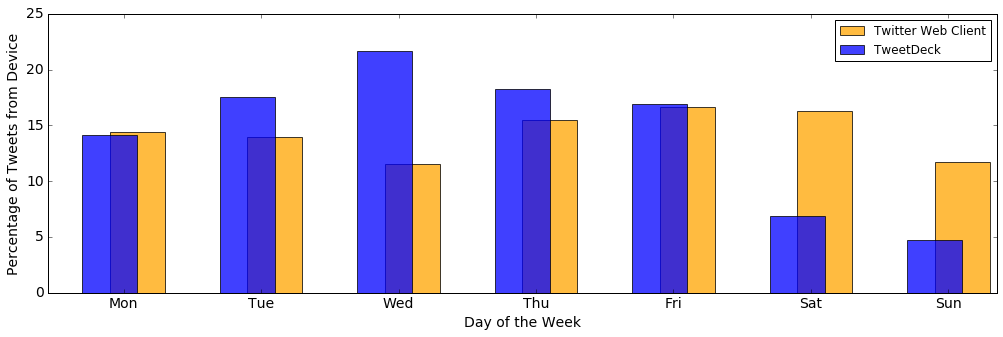

In [8]:
root_dir = "/Users/gogrean/Documents/kaggle/off_kaggle_ds/elect2016/"
fig, ax = plt.subplots(1, figsize=(17,5))

for source, col, pos in zip(sources, color, position_of_bins):
    ordered_by_weekday = grouped_by_source[source].reindex(weekday_ticks) / grouped_by_source[source].sum() * 100.
    stripped_source = re.sub(r'<.*?>', r'', source)
    ordered_by_weekday.plot(kind='bar', ax=ax, color=col, alpha=0.75, 
                            label=stripped_source, position=pos, rot=0,
                            fontsize=14, width=0.4)
plt.xlabel('Day of the Week', fontsize=14)
plt.ylabel('Percentage of Tweets from Device', fontsize=14)
plt.legend(loc='best')
plt.savefig(root_dir + "figs/clinton_tweets_from_device_vs_day_of_week.pdf")

Similarly, I also plot the percentage of tweets from individual devices as a function of time.

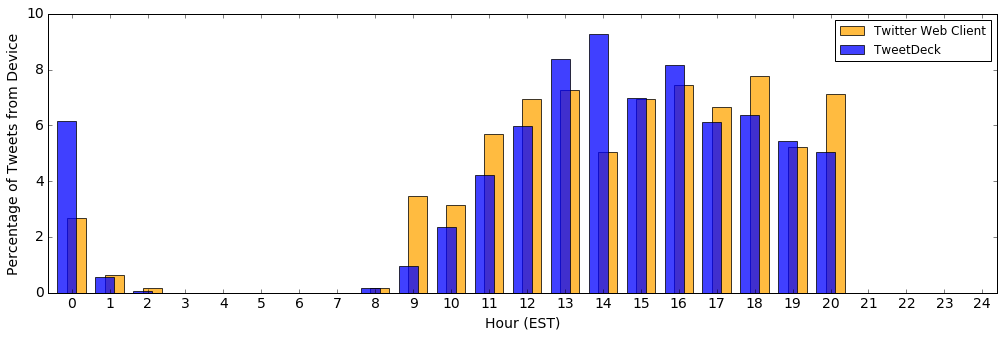

In [9]:
grouped_by_source = df.groupby(by=df['source']).hour.value_counts()
sources = grouped_by_source.index.levels[0]
for source in sources:
    if 'iPhone' in source:
        sources = sources.drop(source)
        
fig, ax = plt.subplots(1, figsize=(17,5))
for source, col, pos in zip(sources, color, position_of_bins):
    ordered_by_hour = grouped_by_source[source].reindex(range(25)) / grouped_by_source[source].sum() * 100.
    stripped_source = re.sub(r'<.*?>', r'', source)
    ordered_by_hour.plot(kind='bar', ax=ax, color=col, alpha=0.75, 
                         label=stripped_source, position=pos, 
                         fontsize=14, rot=0)
plt.xlabel('Hour (EST)', fontsize=14)
plt.ylabel('Percentage of Tweets from Device', fontsize=14)
plt.legend(loc='best')
plt.savefig(root_dir + "figs/clinton_tweets_from_device_vs_hour_EST.pdf")

Finally, I plot the percentage of tweets from individual devices as a function of date.

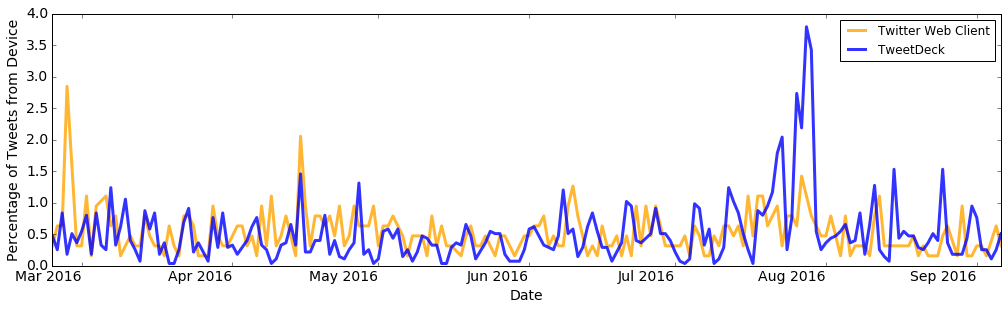

In [10]:
df['date'] = pd.to_datetime(df.date)
grouped_by_source = df.groupby(by=df['source']).date.value_counts()
        
fig, ax = plt.subplots(1, figsize=(17,5))
for source, col in zip(sources, color):
    ordered_by_date = grouped_by_source[source] / grouped_by_source[source].sum() * 100.
    stripped_source = re.sub(r'<.*?>', r'', source)
    ordered_by_date.plot(kind='line', ax=ax, color=col, alpha=0.8, 
                         label=stripped_source, linewidth=3,
                         fontsize=14, rot=0)

plt.xlabel('Date', fontsize=14)
plt.ylabel('Percentage of Tweets from Device', fontsize=14)
plt.legend(loc='best')
plt.savefig(root_dir + "figs/clinton_tweets_from_device_vs_date.pdf")